In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from surprise import Dataset 
from surprise import Reader
from surprise import SVD
from surprise import KNNBasic
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [2]:
reader = Reader(line_format = "user item rating timestamp", sep = ',', skip_lines = 1)
dataset = Dataset.load_from_file("ratings_small.csv", reader = reader)

In [3]:
PMF_RMSE = []
PMF_MAE = []
UB_RMSE = []
UB_MAE = []
IB_RMSE = []
IB_MAE = []

In [4]:
algo = SVD(biased = False)
PMF_CV = cross_validate(algo, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0120  1.0080  0.9997  1.0206  1.0097  1.0100  0.0067  
MAE (testset)     0.7801  0.7800  0.7717  0.7884  0.7802  0.7801  0.0053  
Fit time          0.74    0.58    0.66    0.74    0.77    0.70    0.07    
Test time         0.10    0.06    0.10    0.07    0.11    0.09    0.02    


In [5]:
algo = KNNBasic(sim_options = {'user_based' : True })
CV_UB_CF = cross_validate(algo, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9591  0.9703  0.9692  0.9624  0.9726  0.9667  0.0051  
MAE (testset)     0.7370  0.7450  0.7441  0.7462  0.7457  0.7436  0.0034  
Fit time          0.08    0.09    0.14    0.12    0.13    0.11    0.02    
Test time         0.52    0.69    0.70    0.64    0.73    0.66    0.08    


In [6]:
algo = KNNBasic(sim_options = {'user_based' : False })
CV_IB_CF = cross_validate(algo, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9394  0.9352  0.9342  0.9345  0.9342  0.9355  0.0020  
MAE (testset)     0.7227  0.7226  0.7185  0.7230  0.7201  0.7214  0.0018  
Fit time          2.26    2.81    2.59    2.52    2.63    2.56    0.18    
Test time         3.13    3.58    4.22    3.68    3.83    3.69    0.36    


In [7]:
PMF_RMSE.append(PMF_CV['test_rmse'].mean())
PMF_MAE.append(PMF_CV['test_mae'].mean())
print("Avg Mean Performance of PMF RMSE: " , PMF_RMSE)
print("Avg Mean Performance of PMF MAE: ", PMF_MAE)

Avg Mean Performance of PMF RMSE:  [1.0099950741328685]
Avg Mean Performance of PMF MAE:  [0.7800636821159538]


In [8]:
UB_RMSE.append(CV_UB_CF['test_rmse'].mean())
UB_MAE.append(CV_UB_CF['test_mae'].mean())
print("Avg Mean Performance of User_Based RMSE", UB_RMSE)
print("Avg Mean Performance of User_Based MAE", UB_MAE)

[0.9667252295775809]
[0.7436183116661108]


In [9]:
IB_RMSE.append(CV_IB_CF['test_rmse'].mean())
IB_MAE.append(CV_IB_CF['test_mae'].mean())
print("Avg Mean Performance of Item_Based RMSE", IB_RMSE)
print("Avg Mean Performance of Item_Based MAE", IB_MAE)

[0.935495526442741]
[0.7213931856663146]


In [10]:
algo_UB_cosine = KNNBasic(sim_options = {'name' : 'cosine', 'user_based' : True})
CV_UB_cosine = cross_validate(algo_UB_cosine, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_UB_msd = KNNBasic(sim_options = {'user_based' : True})
CV_UB_msd = cross_validate(algo_UB_msd, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_UB_pearson = KNNBasic(sim_options = {'name' : 'pearson_baseline', 'user_based' : True})
CV_UB_pearson = cross_validate(algo_UB_pearson, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

algo_IB_cosine = KNNBasic(sim_options = {'name' : 'cosine', 'user_based' : False})
CV_IB_cosine = cross_validate(algo_IB_cosine, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_IB_msd = KNNBasic(sim_options = {'user_based' : False})
CV_IB_msd = cross_validate(algo_IB_msd, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)
algo_IB_pearson = KNNBasic(sim_options = {'name' : 'pearson_baseline', 'user_based' : False})
CV_IB_pearson = cross_validate(algo_IB_pearson, dataset, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9940  0.9946  0.9935  0.9904  0.9937  0.9932  0.0015  
MAE (testset)     0.7674  0.7677  0.7656  0.7669  0.7688  0.7673  0.0010  
Fit time          0.30    0.25    0.23    0.23    0.30    0.26    0.03    
Test time         0.68    0.71    0.65    0.92    0.64    0.72    0.10    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
D

In [11]:
UB_RMSE_PLOT = []
UB_MAE_PLOT = []
UB_RMSE_PLOT.append(CV_UB_cosine['test_rmse'].mean())
UB_RMSE_PLOT.append(CV_UB_msd['test_rmse'].mean())
UB_RMSE_PLOT.append(CV_UB_pearson['test_rmse'].mean())
UB_MAE_PLOT.append(CV_UB_cosine['test_mae'].mean())
UB_MAE_PLOT.append(CV_UB_msd['test_mae'].mean())
UB_MAE_PLOT.append(CV_UB_pearson['test_mae'].mean())

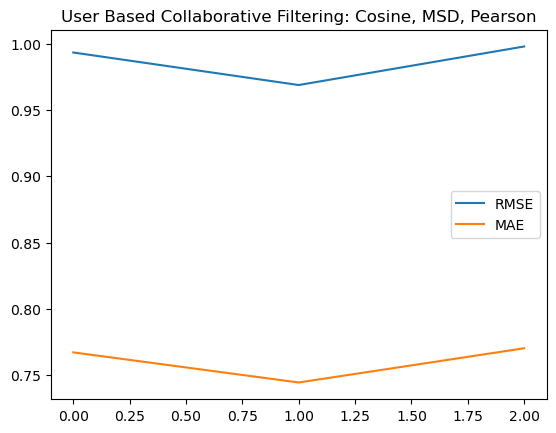

In [12]:
plt.title("User Based Collaborative Filtering: Cosine, MSD, Pearson")
plt.plot(UB_RMSE_PLOT, label = 'RMSE')
plt.plot(UB_MAE_PLOT, label = 'MAE')
plt.legend()

In [13]:
IB_RMSE_PLOT = []
IB_MAE_PLOT = []
IB_RMSE_PLOT.append(CV_IB_cosine['test_rmse'].mean())
IB_RMSE_PLOT.append(CV_IB_msd['test_rmse'].mean())
IB_RMSE_PLOT.append(CV_IB_pearson['test_rmse'].mean())
IB_MAE_PLOT.append(CV_IB_cosine['test_mae'].mean())
IB_MAE_PLOT.append(CV_IB_msd['test_mae'].mean())
IB_MAE_PLOT.append(CV_IB_pearson['test_mae'].mean())

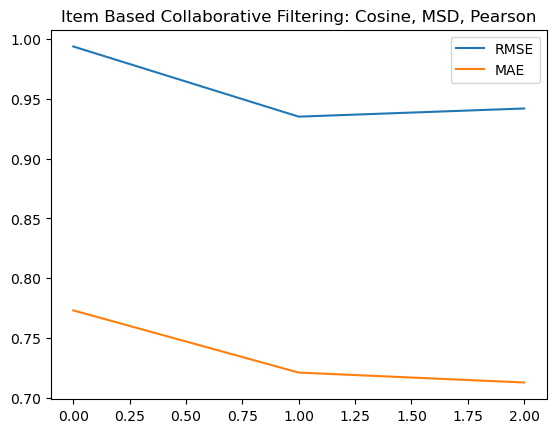

In [14]:
plt.title("Item Based Collaborative Filtering: Cosine, MSD, Pearson")
plt.plot(IB_RMSE_PLOT, label = 'RMSE')
plt.plot(IB_MAE_PLOT, label = 'MAE')
plt.legend()

Text(0, 0.5, 'RMSE')

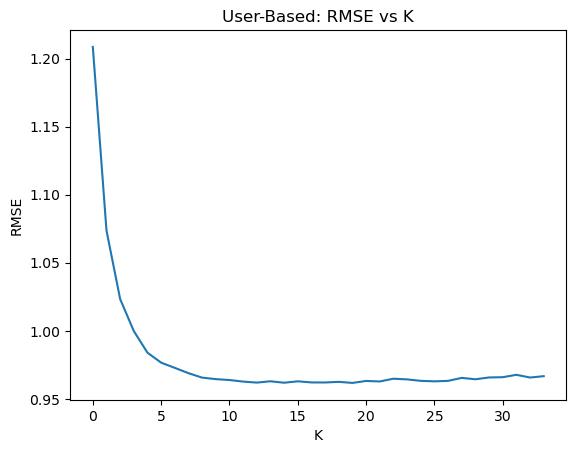

In [17]:
Range = range(1,35)
user_based = []

for i in Range:
        algo = KNNBasic(k = i, sim_options = {'user_based' : True }, verbose = False)
        cv_user = cross_validate(algo, dataset, measures=['rmse', 'mae'],cv = 5,verbose = False)
        user_based.append(cv_user['test_rmse'].mean())
        
plt.plot(user_based)
plt.title("User-Based: RMSE vs K")
plt.xlabel('K')
plt.ylabel('RMSE')

Text(0, 0.5, 'RMSE')

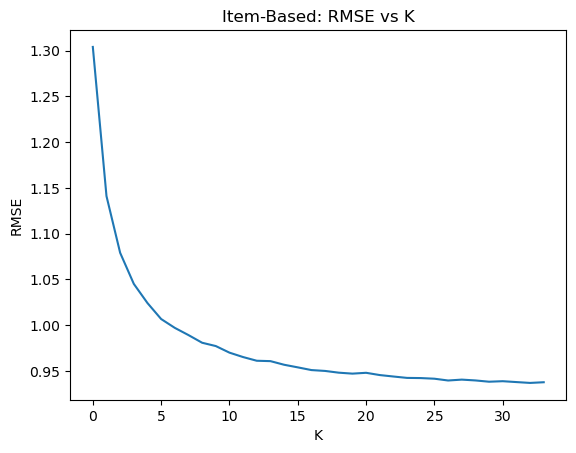

In [18]:
Range = range(1,35)
item_based = []

for i in Range:
        algo = KNNBasic(k = i, sim_options = {'user_based' : False }, verbose = False)
        cv_item = cross_validate(algo, dataset, measures=['rmse', 'mae'],cv = 5,verbose = False)
        item_based.append(cv_item['test_rmse'].mean())
        
plt.plot(item_based)
plt.title("Item-Based: RMSE vs K")
plt.xlabel('K')
plt.ylabel('RMSE')

In [19]:
print("Best K for User Based CF: {}".format(user_based.index(min(user_based))))
print("Best K for Item Based CF: {}".format(item_based.index(min(item_based))))

Best K for User Based CF: 19
Best K for Item Based CF: 32
